# 
valuation Project - 9
Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
import matplotlib.ticker as mtick 
from sklearn.metrics import plot_roc_curve 
import os
from textwrap import wrap

In [70]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [71]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [72]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 
These are the categorical columns in the given dataset

In [73]:
df.shape

(7043, 21)

# 
Dataset having 7043 rows and 21 columns

In [74]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 
The dataset contains integer, object and float type data

In [75]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# 
These are the unique values present in each column

In [76]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 
Missing value is not present in our data. 

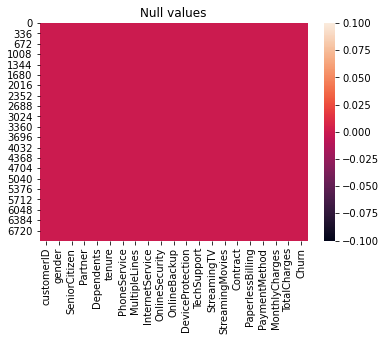

In [77]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

# 
There are no null values in our data 

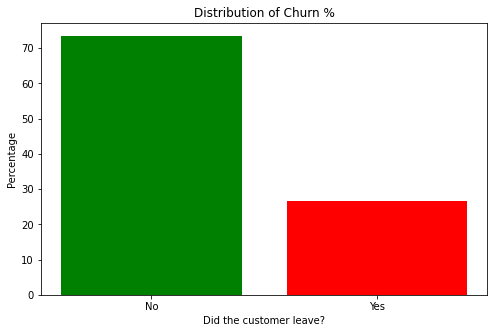

In [78]:
fig, axes = plt.subplots(figsize=(8,5))
data = df["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

# 
> In the dataset provided, close to 30% customers churned, while the rest remained with the service provider.


> In order to make analysis easier in this section, we will add a new column with numerical value of "Churn" right now. Let's call the column as ChurnVal, such that - Yes = 1 and No = 0.

In [79]:
df = df.apply(LabelEncoder().fit_transform)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


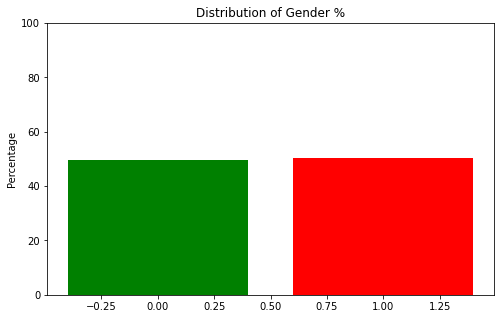

In [82]:
fig, axes1 = plt.subplots(figsize=(8,5))

data = df["gender"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['red','green'])
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

plt.show()

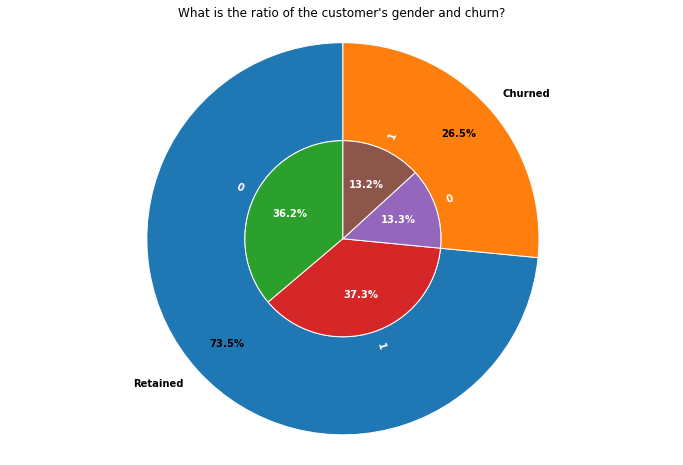

In [84]:
fig, axes2 = plt.subplots(figsize=(12,8))


width = 0.5


data = df.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)


data = df.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')

axes2.axis('equal')

plt.show()

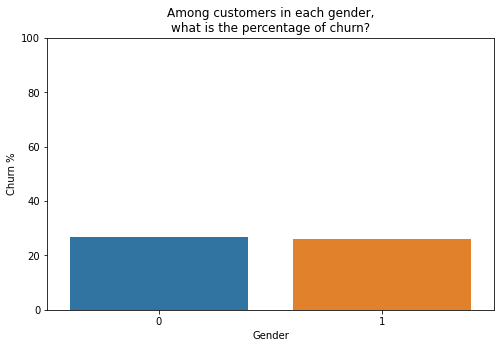

In [89]:
fig, axes3 = plt.subplots(figsize=(8,5))

sns.barplot(x="gender", y=df["Churn"]*100, data=df, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

# 
The dataset has almost equal distribution of male and female customers.


Both in the churned or retained category - percentage of males and females are almost equally distributed.


Out of all male customers, approx 26% churned. While among females, the churn percentage is approx 27%. Both are almost at equal level.


It can be concluded that probability of churn does not depend on gender of the customer.

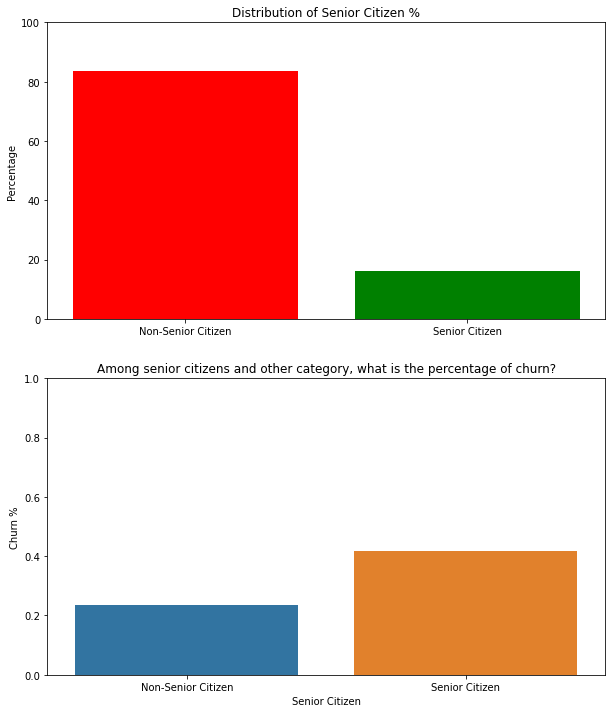

In [93]:
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))


data = df["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=['red','green'])
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)


sns.barplot(x="SeniorCitizen", y="Churn", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()

# 
1. Majority of the customers in dataset are Non-Senior Citizens (> 80%).

2. Out of all senior citizen customers, more than 40% churned. While among younder customers, the churn percentage is less than 25%.

3. Hence, senior citizens tend to churn more than younger customers.

4. Thus, SeniorCitizen and Churn features seem to be related.

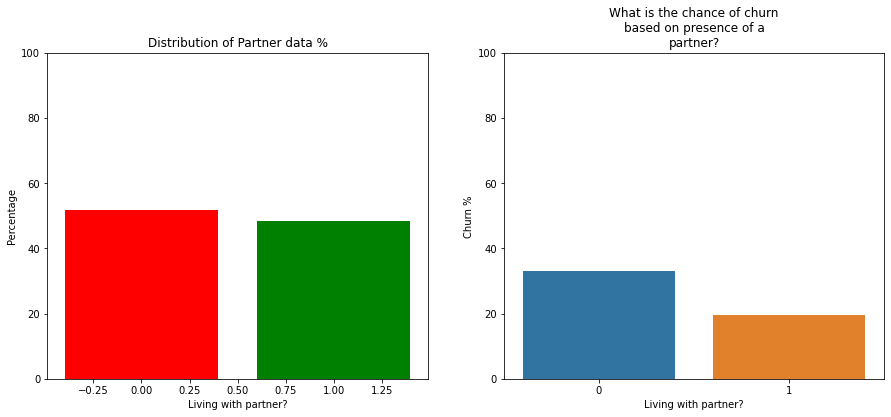

In [94]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))


data = df["Partner"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['red','green'])
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)


sns.barplot(x="Partner", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of a partner?', 30)))
axes2.set_ylim(0,100)

plt.show()

# 
1.The dataset contains almost equal distribution of customer data - either living alone or with partner.

2.Customers living alone tend to churn more (~35% vs ~20%).

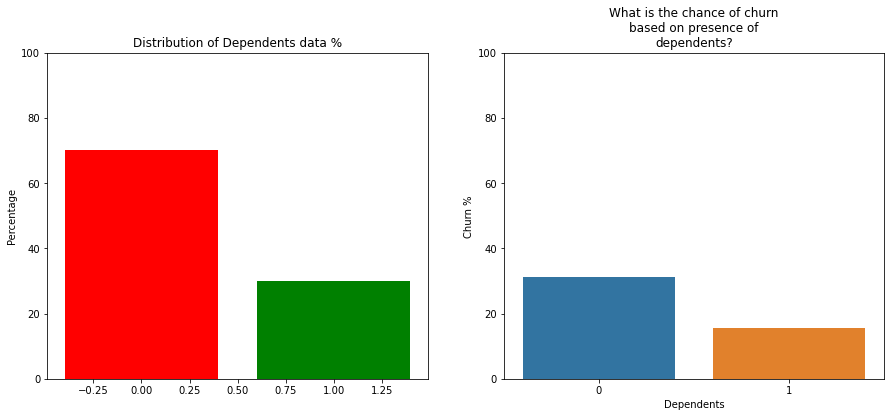

In [97]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))


data = df["Dependents"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['red','green'])
axes1.set_title('Distribution of Dependents data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)


sns.barplot(x="Dependents", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of dependents?', 30)))
axes2.set_ylim(0,100)

plt.show()

# 
1. The dataset contains almost 70% customers who does not have a dependent, while 30% has one or more dependents.

2. Customers without depedents tend to churn more (~30% vs ~20%).

3. From Partner and Dependents data we can conclude that - customers who are single/independent, i.e. without partners or dependents tend to leave the CSP more, while customers with partner and/or dependents, usually continue with the same CSP.

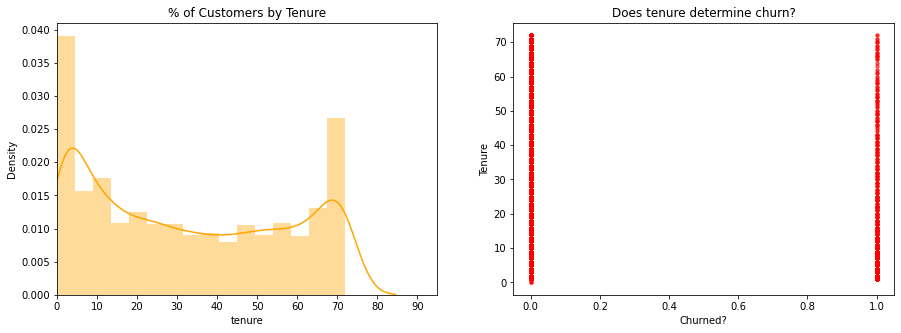

In [98]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

sns.distplot(df.tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

axes2.scatter(df.Churn, df.tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

# 
1. Majority of the customers in the dataset are rather short-lived (less than a year). So, either people churn within a year, or these are newly acquired customers. We'll find out soon.

2. Interestingly, there's a spike of number in number for customers who've been with the CSP for more than 5 years.

3. From the other diagram as well we observe that the churn rate is bit thinner for very long tenure customers.

4. Next, we will categorize the tenure data into years and find correlation with churn rate.

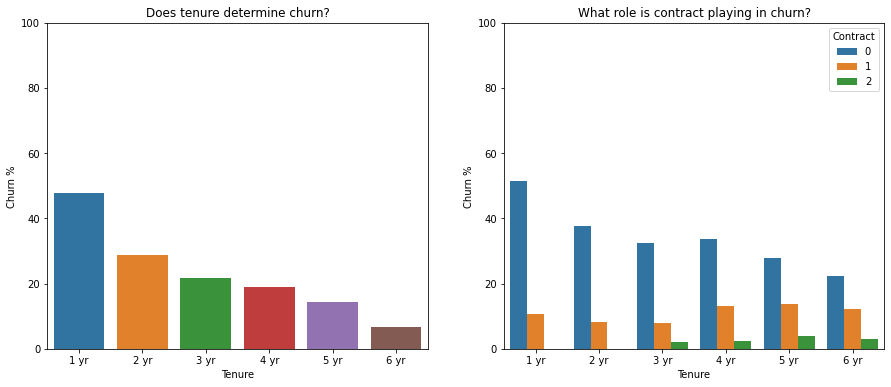

In [100]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
df['tenureGroup'] = pd.cut(df["tenure"], bins, labels=labels)

fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=df.Churn*100, data=df, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

sns.barplot(x="tenureGroup", y=df.Churn*100, hue="Contract", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')

plt.show()

# 
0 = Month to Month 
1 = One Year 
2 = Two Year 


Observations:

1. We divided the customer tenure into categories as - 1 year, 2 years to 6 years. It is apparent that newly acquired customers tend to churn more (~almost 50% of customers who have subscribed within last 1 years have left).

2. As customer tenure increases, the chance of churn decreases accordingly.

3. Hence, the CSP should concentrate on retaining newly acquired customers. If they can somehow hold the customers for more couple of years, the possibility of those customers continuing with the same CSP increases multifold.

4. In addition, CSP should try to get customers on contract for longer duration instead of selling monthly plans. This is another important factor for churn determination.

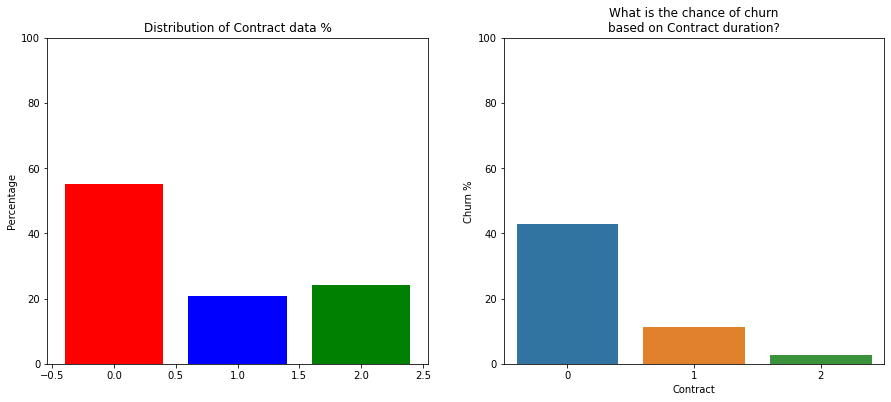

In [102]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

data = df["Contract"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['red','green','blue'])
axes1.set_title('Distribution of Contract data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="Contract", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Contract duration?', 30)))
axes2.set_ylim(0,100)

plt.show()


# 

0 = Month to Month 
1 = one year contract
2 = two year 

Observations:

1. ~55% customer are on month-to-month (or monthly) plans, while little more than 20% each are on 1 or 2 years contract.
2. The churn rate is high among monthly customers and least among 2-year contracted customers. While this is expected because of the contract duration, this is an alarming signal for CSP since should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.

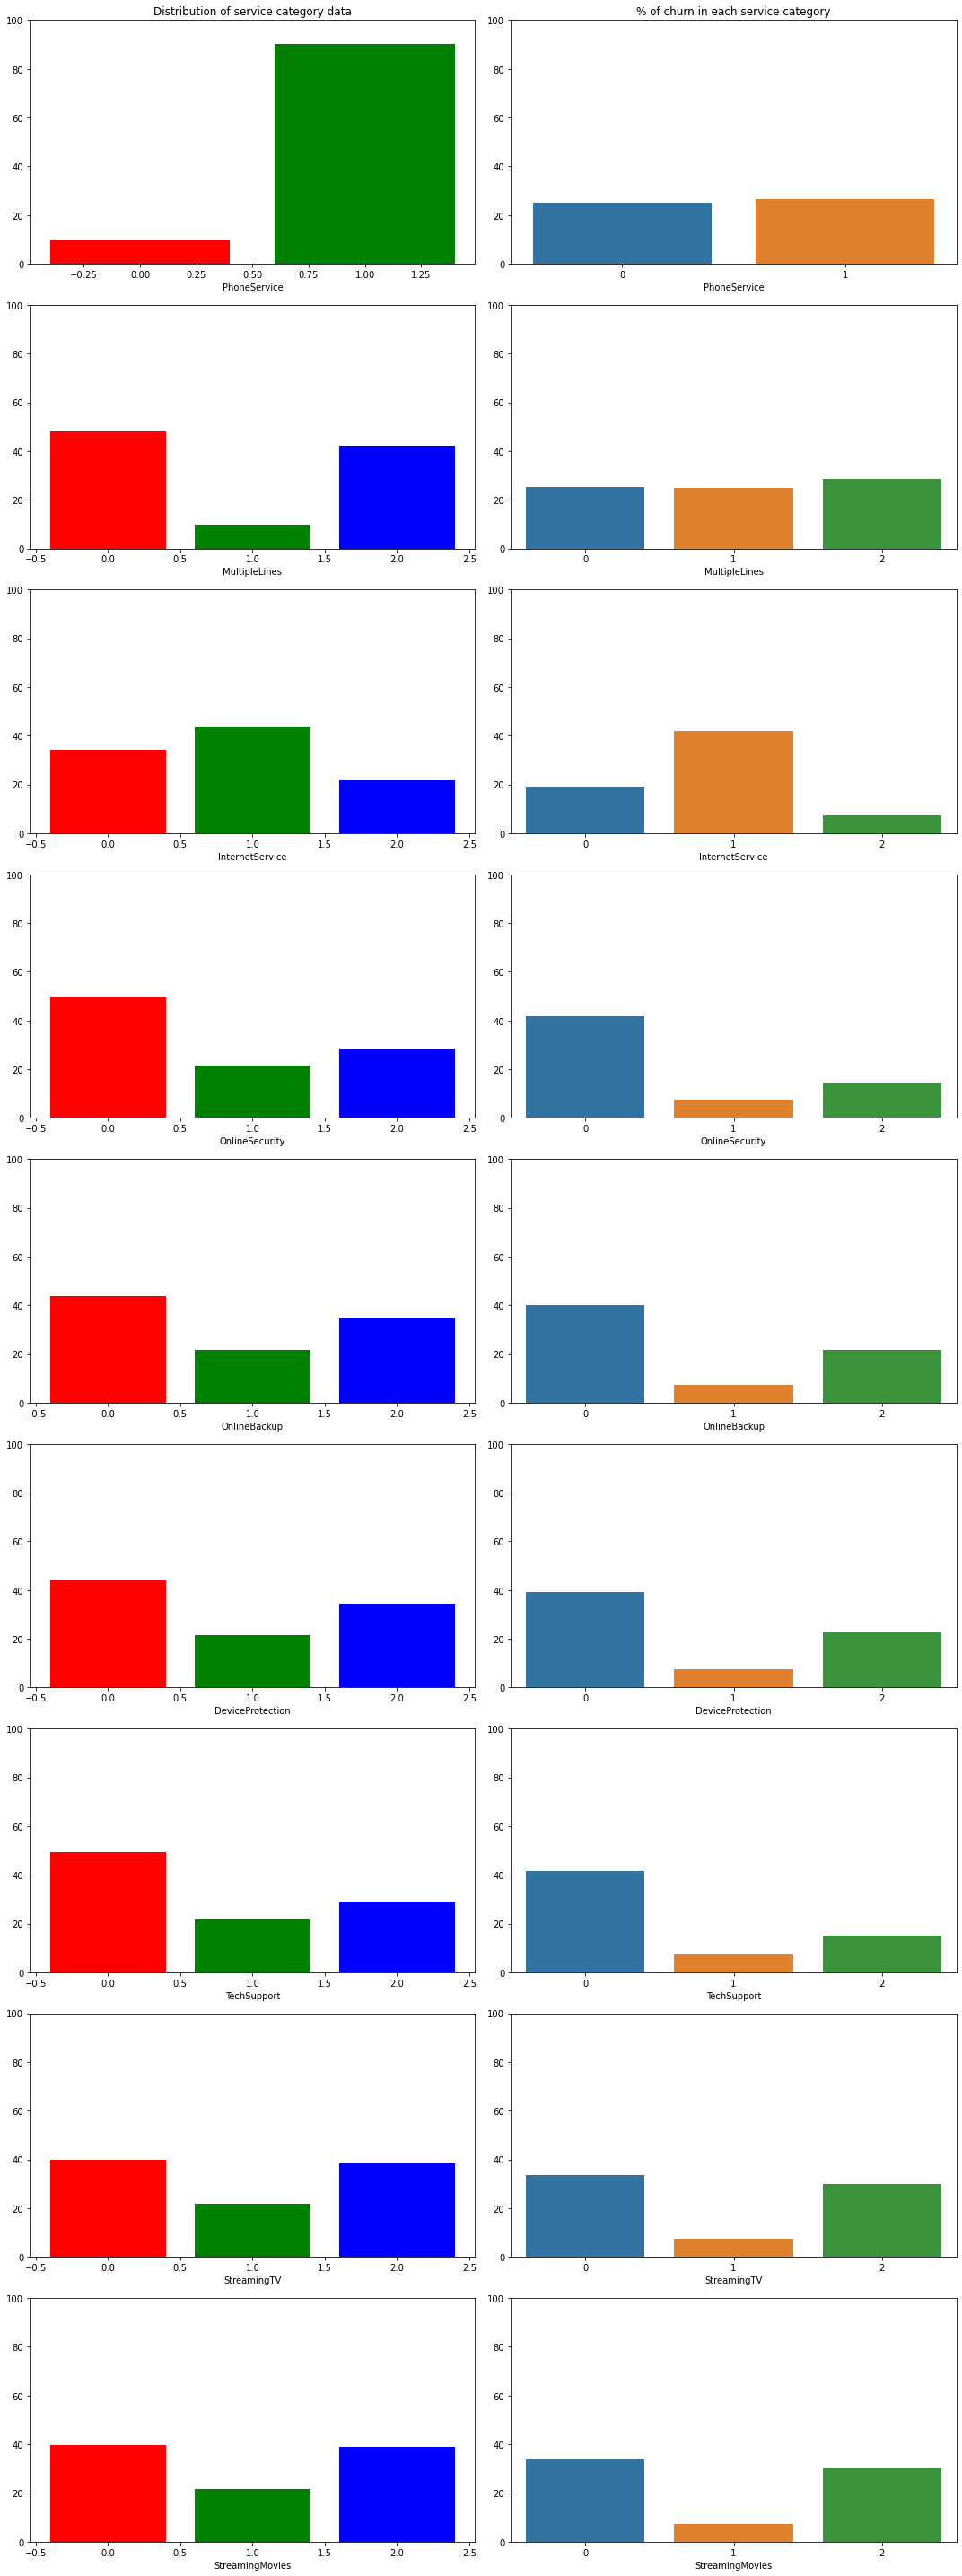

In [104]:
Services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
n_rows = len(Services)
fig = plt.figure(figsize=(15,40))

idx = 0

for serviceType in enumerate(Services):
    
    data = df[serviceType[1]].value_counts(normalize=True).sort_index()

    
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        
        if idx%2 != 0:
            axes.bar(data.index, data*100, color=['red','green','blue'])
        
        else:
            sns.barplot(x=serviceType[1], y=df.Churn*100, data=df, ci=None, ax=axes)

        if idx == 1 : axes.set_title('Distribution of service category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

# 
0.0 - 0.5/0  = No 
0.5 - 1.5/1  = No internet service 
1.5 - 2.5/2  = Yes


1. Phone Service - Almost all (90%) customers have Phone Service. However, the churn rate is very low compared to the volume (~25%). On the other hand, churn rate is almost same (~25%) among non-phone service customers as well (though they form only 10% of the population). Thus, selling Phone Service is more beneficial for the CSP.

2. Multiple Lines - Among Phone Service users, 45% has Multiple Lines while the rest 45% have single line. Churn rate is slightly higher among users with multiple lines, but not that significant (~28%).

3. Internet Service - Approx 20% customers do not use internet. Among customers using internet, approx 45% use Fiber Optic and 35% use DSL. However, churn among Fiber Optic users is pretty high as well (> 40%), while it is 20% among DSL users. Hence, CSP needs to look into the quality of its internet service.

4. Online Security - ~50% customers do not use online security service, and churn rate among such users is highest as well (~40%).

5. Online Backup, Device Protection and Tech Support - Same as above, most of the customers do not use this service and they tend to churn as well.

6. Streaming TV and Streaming Movies - Among users with internet services (which is mandatory for availing these services), almost half use these streaming services. The rate of churn is more or less same as well (~35%) irrespective of usage of streaming services.

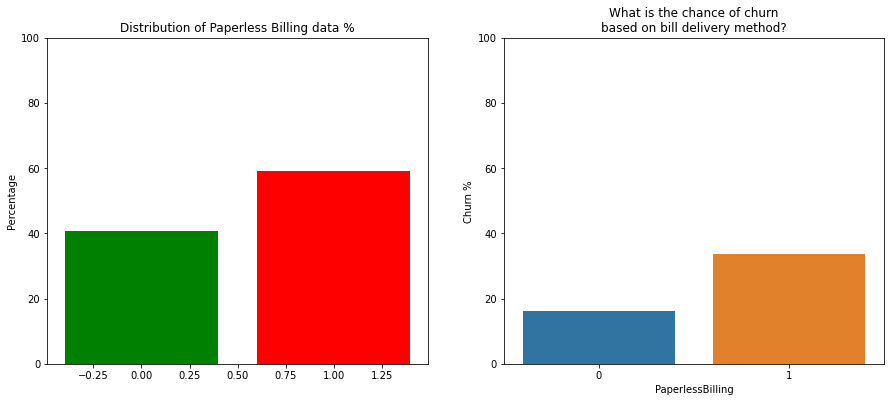

In [106]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

data = df["PaperlessBilling"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['red','green'])
axes1.set_title('Distribution of Paperless Billing data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

sns.barplot(x="PaperlessBilling", y=df.Churn*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on bill delivery method?', 30)))
axes2.set_ylim(0,100)

plt.show()

# 
1. Almost 60% customers prefer paper-less billing.

2. Almost 35% of them left the CSP.

3. Now, apparently a direct relation between bill mode and churn cannot be established, it must be investigated if customers receiving soft copies of bills are getting clear and transparent information on all the charges, and proper service and care if they face any difficutly in interpreting the bills.

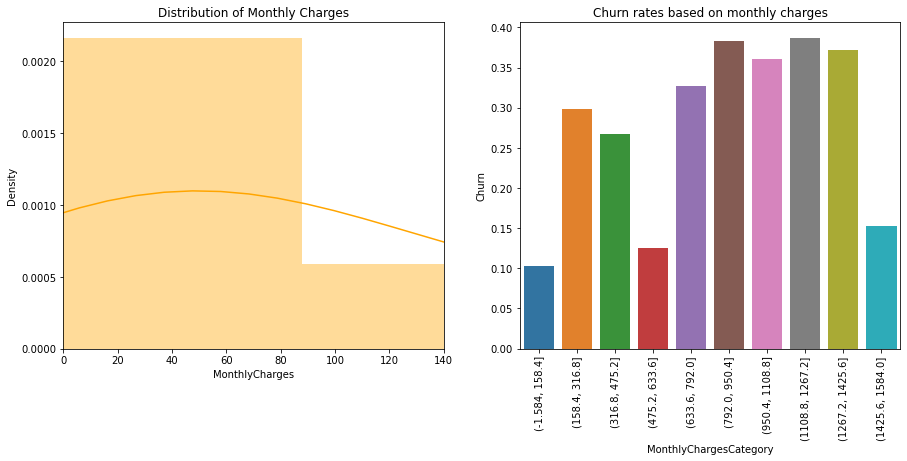

In [114]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

sns.distplot(df.MonthlyCharges, color='orange', ax=axes1)
axes1.set_title('Distribution of Monthly Charges')
axes1.set_xlim(0,140)

df['MonthlyChargesCategory'] = pd.cut(df["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='Churn', data=df, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on monthly charges')

plt.show()


In [125]:
df = df.apply(LabelEncoder().fit_transform)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,MonthlyChargesCategory
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,142,2505,0,0,0
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,498,1466,0,2,3
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,436,157,1,0,2
3,5535,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,266,1400,0,3,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,729,925,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,1,1,3,991,1597,0,1,6
7039,1525,0,0,1,1,72,1,2,1,0,...,2,2,1,1,1,1340,5698,0,5,8
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,1,2,137,2994,0,0,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,1,3,795,2660,1,0,5


# 
The categorical columns has been converted into numerical columns by using label encoding

In [126]:
print(df.corr())

                        customerID    gender  SeniorCitizen   Partner  \
customerID                1.000000  0.006288      -0.002074 -0.026729   
gender                    0.006288  1.000000      -0.001874 -0.001808   
SeniorCitizen            -0.002074 -0.001874       1.000000  0.016479   
Partner                  -0.026729 -0.001808       0.016479  1.000000   
Dependents               -0.012823  0.010517      -0.211185  0.452676   
tenure                    0.008035  0.005106       0.016567  0.379697   
PhoneService             -0.006483 -0.006488       0.008576  0.017706   
MultipleLines             0.004316 -0.006739       0.146185  0.142410   
InternetService          -0.012407 -0.000863      -0.032310  0.000891   
OnlineSecurity            0.013292 -0.015017      -0.128221  0.150828   
OnlineBackup             -0.003334 -0.012057      -0.013632  0.153130   
DeviceProtection         -0.006918  0.000549      -0.021398  0.166330   
TechSupport               0.001140 -0.006825      -

<function matplotlib.pyplot.show(close=None, block=None)>

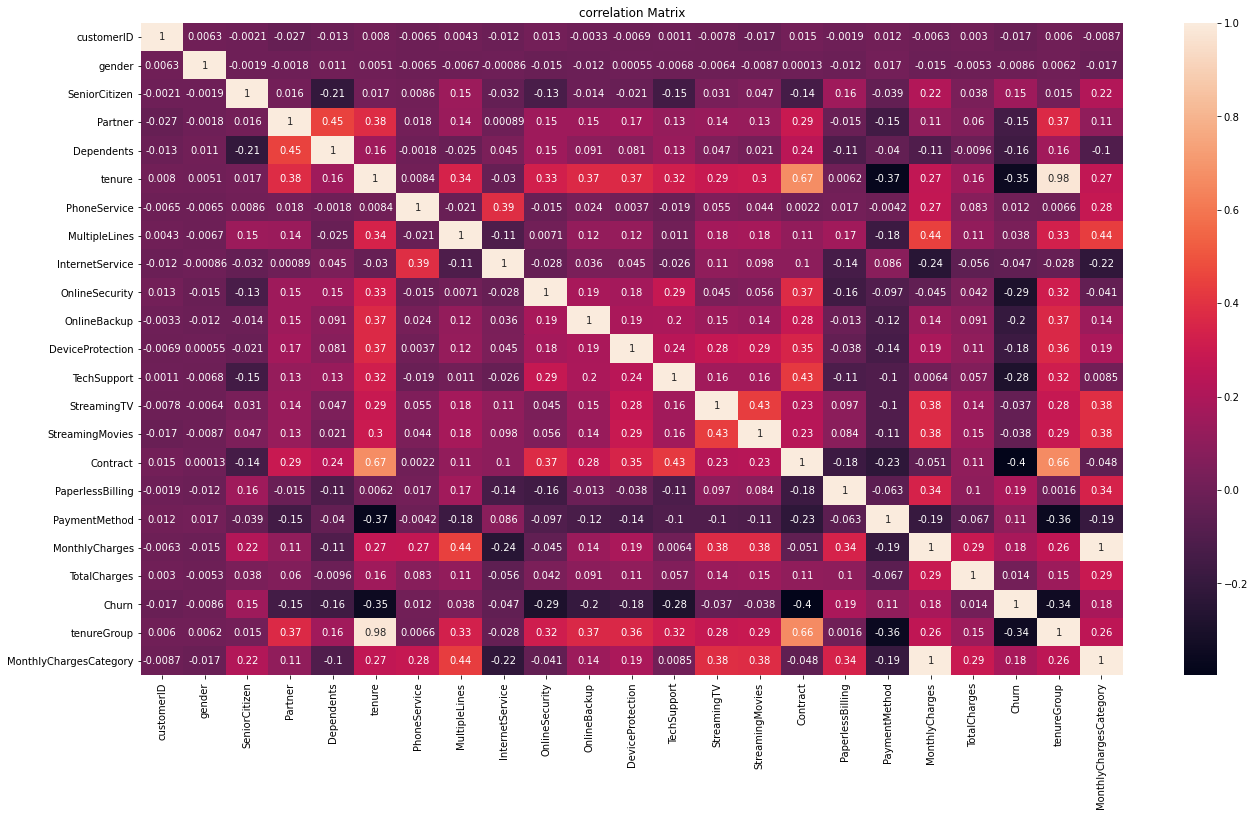

In [127]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

# 
a).The target column Churn is highly positively correlated with the PaperlessBilling.

b).The other features have very less correlation with the target column.

c).Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

e).Dark shades are highly correlated and light shades are very less correlated.

In [128]:
corr_matrix=df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
PaperlessBilling          0.191825
MonthlyCharges            0.183523
MonthlyChargesCategory    0.182548
SeniorCitizen             0.150889
PaymentMethod             0.107062
MultipleLines             0.038037
TotalCharges              0.014479
PhoneService              0.011942
gender                   -0.008612
customerID               -0.017447
StreamingTV              -0.036581
StreamingMovies          -0.038492
InternetService          -0.047291
Partner                  -0.150448
Dependents               -0.164221
DeviceProtection         -0.178134
OnlineBackup             -0.195525
TechSupport              -0.282492
OnlineSecurity           -0.289309
tenureGroup              -0.341033
tenure                   -0.352229
Contract                 -0.396713
Name: Churn, dtype: float64

# 
The target column Churn is highly positively correlated with the PaperlessBilling  

In [129]:
x=df.drop('Churn', axis=1)
y=df['Churn']

In [130]:
x.skew()

customerID                0.000000
gender                   -0.019031
SeniorCitizen             1.833633
Partner                   0.067922
Dependents                0.875199
tenure                    0.239540
PhoneService             -2.727153
MultipleLines             0.118719
InternetService           0.205423
OnlineSecurity            0.416985
OnlineBackup              0.182930
DeviceProtection          0.186847
TechSupport               0.402365
StreamingTV               0.028486
StreamingMovies           0.014657
Contract                  0.630959
PaperlessBilling         -0.375396
PaymentMethod            -0.170129
MonthlyCharges            0.014263
TotalCharges              0.015857
tenureGroup               0.250918
MonthlyChargesCategory    0.060762
dtype: float64

# 
If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed

In [133]:
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [134]:
x.skew()

customerID               -0.054081
gender                   -0.019031
SeniorCitizen             1.833633
Partner                   0.067922
Dependents                0.875199
tenure                   -0.066621
PhoneService             -2.727153
MultipleLines             0.028864
InternetService           0.037959
OnlineSecurity            0.109444
OnlineBackup              0.009375
DeviceProtection          0.010793
TechSupport               0.102056
StreamingTV              -0.043573
StreamingMovies          -0.048220
Contract                  0.247524
PaperlessBilling         -0.375396
PaymentMethod            -0.026855
MonthlyCharges           -0.086630
TotalCharges             -0.055855
tenureGroup              -0.030244
MonthlyChargesCategory   -0.047670
dtype: float64

# 
The data is almost normal also we have removed the skewness that we can notice in the above

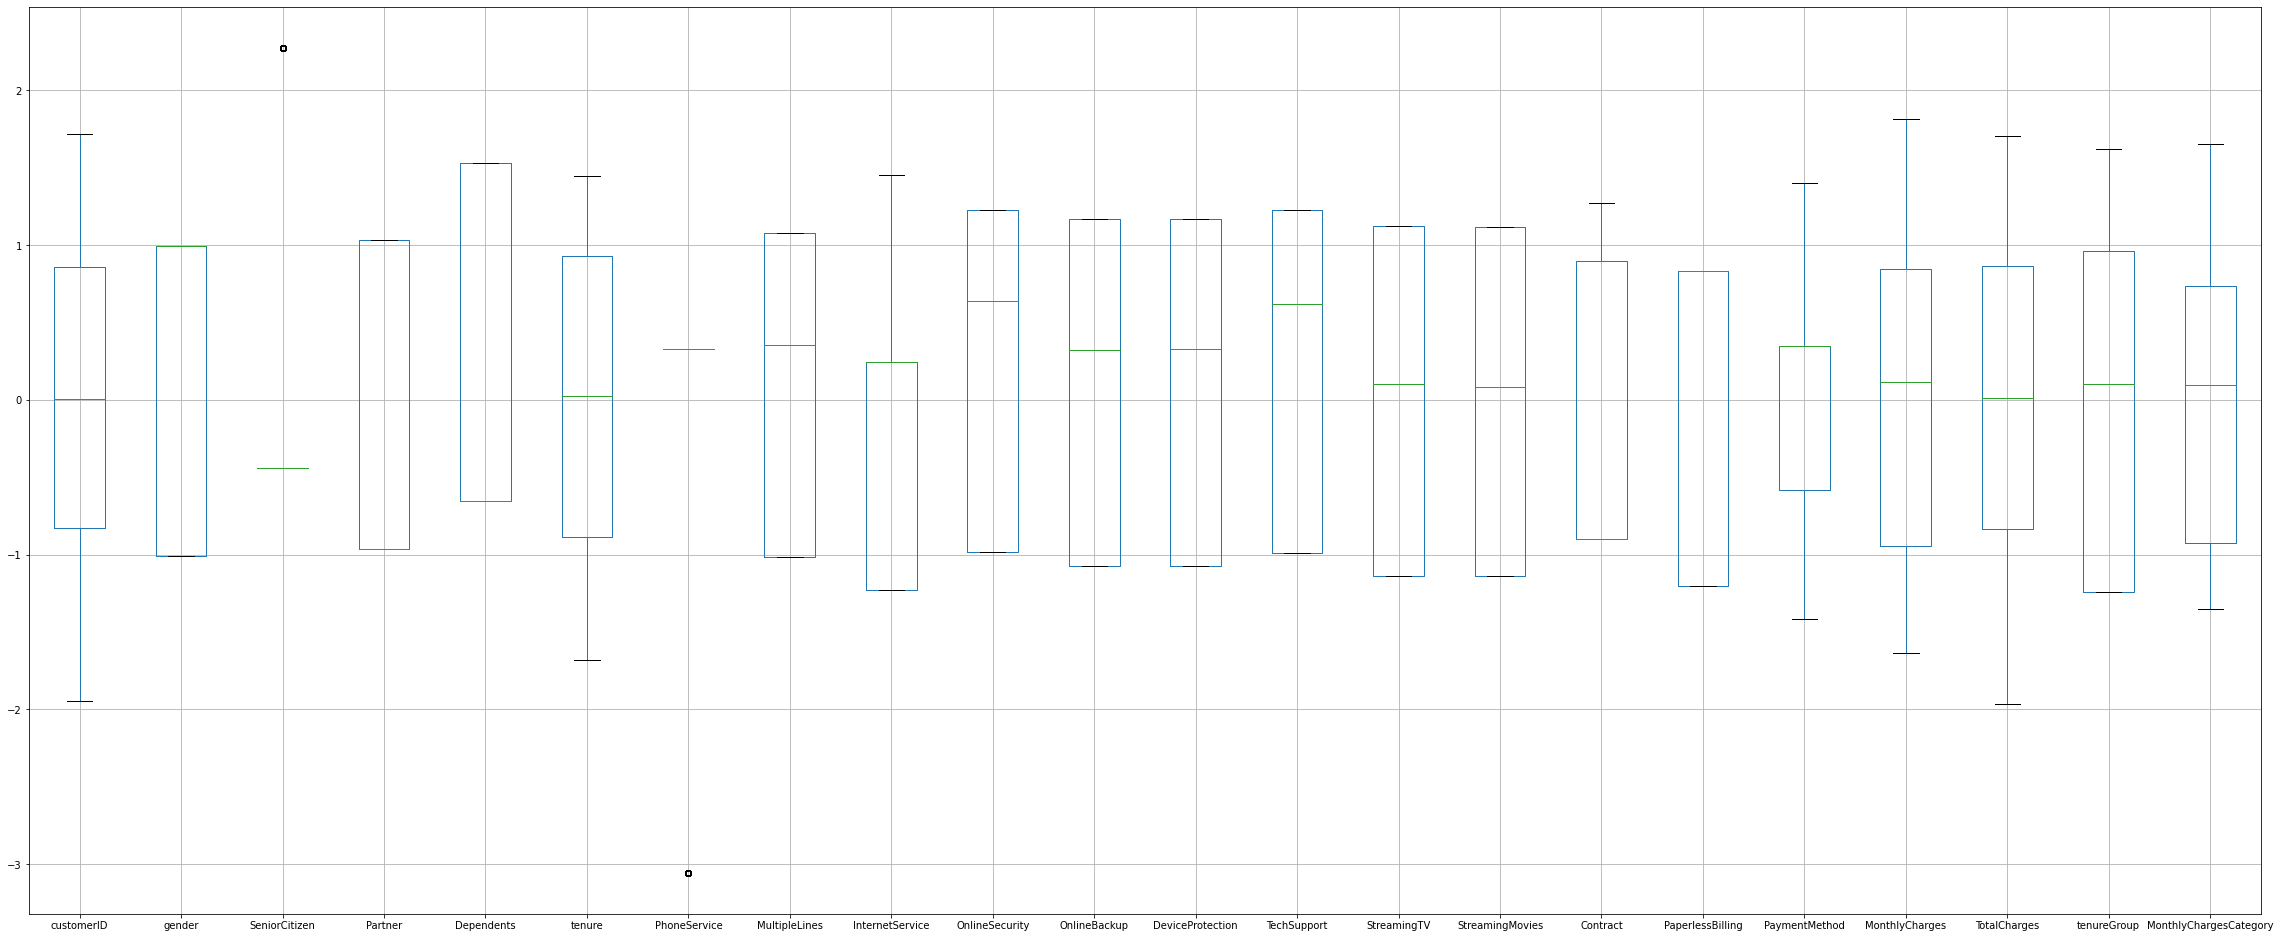

In [135]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

# 
Since Senior Citizen,Phone  outliers.In all i have to remove outliers.

In [136]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [137]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,MonthlyChargesCategory
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,498,1466,0,2,3
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,436,157,1,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,729,925,1,0,4
5,6551,0,0,0,0,8,1,2,1,0,...,2,2,0,1,2,1274,6104,1,0,8
6,1002,1,0,0,1,22,1,2,1,0,...,2,0,0,1,1,1075,1550,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,72,1,0,2,1,...,1,1,2,1,0,52,770,0,5,0
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,1,1,3,991,1597,0,1,6
7039,1525,0,0,1,1,72,1,2,1,0,...,2,2,1,1,1,1340,5698,0,5,8
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,1,3,795,2660,1,0,5


# 
This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [138]:
df_new_z.shape

(6361, 23)

In [140]:
data_loss = (7043-6361)/7043*100
data_loss

9.683373562402386

# 
Using Zscore i have 9.6833% data loss.Which is less than 10%

In [141]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# 
Here we can notice the class imbalancing issue so lets use SMOTE to balance the data

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [144]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# 
The data is balanced now, Since the highest count of the target is 5174 so the data is balanced by oversampling all the classes to the count 5174.

In [145]:
df_new_z.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,MonthlyChargesCategory
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,498,1466,0,2,3
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,436,157,1,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,729,925,1,0,4
5,6551,0,0,0,0,8,1,2,1,0,...,2,2,0,1,2,1274,6104,1,0,8
6,1002,1,0,0,1,22,1,2,1,0,...,2,0,0,1,1,1075,1550,0,1,6


In [146]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)  

Best accuracy is 0.7893719806763285 on Random_state 17


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 17)

#  
We have created a new train test split using Random State

In [149]:
R = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 78.93719806763285
[[772 253]
 [183 862]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1025
           1       0.77      0.82      0.80      1045

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



# 
The accuracy using Logistic Regression Classifier is 78.9371%

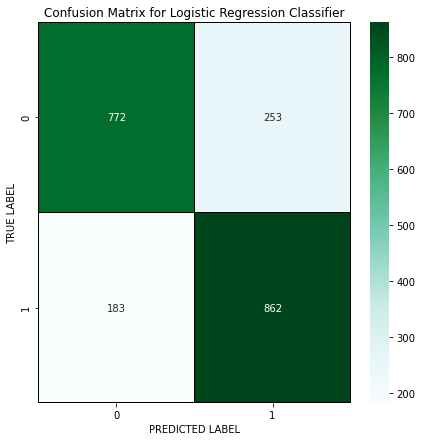

In [150]:
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


In [151]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.33816425120773
[[808 217]
 [190 855]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1025
           1       0.80      0.82      0.81      1045

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



# 
The accuracy by using Decision Tree Classifier is  80.3381%

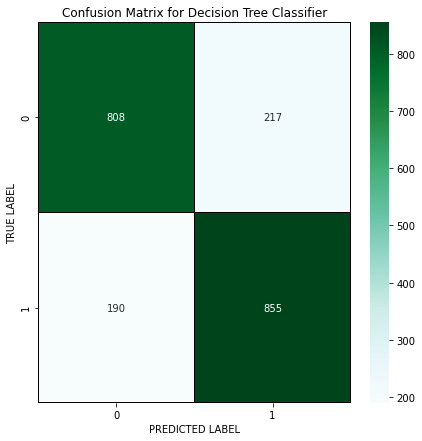

In [152]:
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [153]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.32850241545894
[[871 154]
 [129 916]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1025
           1       0.86      0.88      0.87      1045

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



# 
The accuracy by using Random Forest Classifier is 86.3285

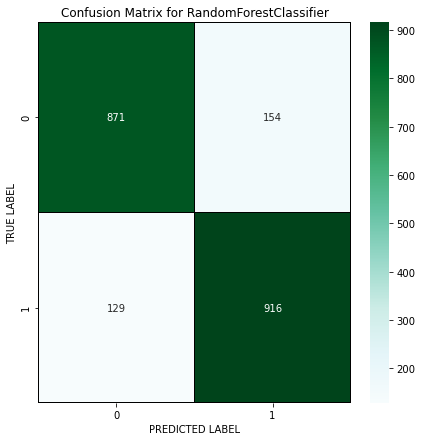

In [154]:
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [155]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 82.6086956521739
[[809 216]
 [144 901]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1025
           1       0.81      0.86      0.83      1045

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



# 
The accuracy using SVC is 82.60869%

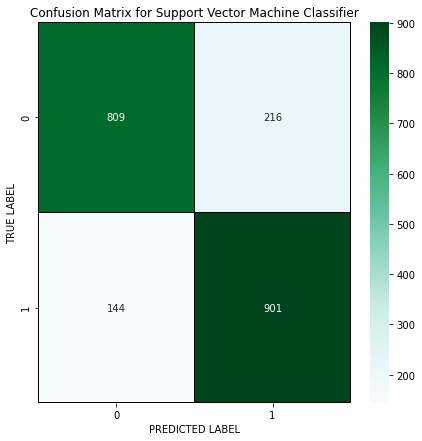

In [156]:
cm = confusion_matrix(y_test,ad_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [157]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.7766730876546583


In [158]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.8607566492249283


In [159]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.8121426253201738


In [160]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [161]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [162]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

79.27536231884058


In [163]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8304347826086956

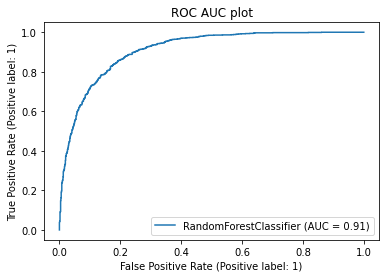

In [164]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# 
This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate

In [165]:
import joblib 
joblib.dump(GCV.best_estimator_,"Coustmerchurn_prediction.pkl")

['Coustmerchurn_prediction.pkl']

In [175]:
model=joblib.load("Coustmerchurn_prediction.pkl")


prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [176]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2065,0,0
2066,0,0
2067,1,1
2068,1,1


# 
 We can observe both original and predicted values are same. That means the loan approval status for both predicted and original are same